In [1]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data in a pandas dataframe
df = pd.read_csv('911.csv') # Version 32

In [3]:
# View the first 5 rows
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [4]:
# View the columns and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


### Quick Insights

In [5]:
# Top 5 Zipcodes with the most 911 Calls
top_zipcodes = df['zip'].value_counts().head()
top_zipcodes

zip
19401.0    45606
19464.0    43910
19403.0    34888
19446.0    32270
19406.0    22464
Name: count, dtype: int64

In [6]:
# Top 5 Townships with the most 911 Calls
top_townships = df['twp'].value_counts().head()
top_townships

twp
LOWER MERION    55490
ABINGTON        39947
NORRISTOWN      37633
UPPER MERION    36010
CHELTENHAM      30574
Name: count, dtype: int64

In [7]:
# No of different titles
diff_titles = len(df['title'])
diff_titles

663522

### Features

In [7]:
# Create a column 'Reason' to analyse the different reasons for the calls
df['Reasons'] = df['title'].apply(lambda title: title.split(':')[0])
df['Reasons'].value_counts()

Reasons
EMS        332692
Traffic    230208
Fire       100622
Name: count, dtype: int64

Text(0.5, 1.0, 'No of Calls per Reason')

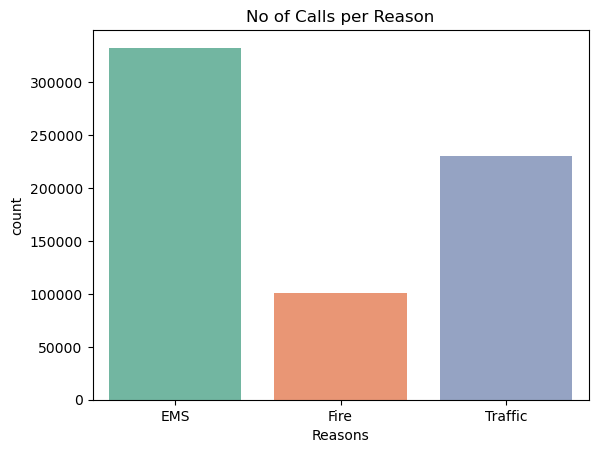

In [13]:
# Reasons Count Plot
sns.countplot(x='Reasons', data=df, palette="Set2")
plt.title("No of Calls per Reason")

In [8]:
# Data Formatting

# Converting timeStamp to datetime format
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [10]:
# Creating Columns for Hour, Month and Day of the week
df['Hour'] = df['timeStamp'].dt.hour
df['Month'] = df['timeStamp'].dt.month
df['Day of Week'] = df['timeStamp'].dt.dayofweek

In [12]:
# Converting Day of the Week from integer to string names of the day of the week
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week'] = df['Day of Week'].map(dmap)

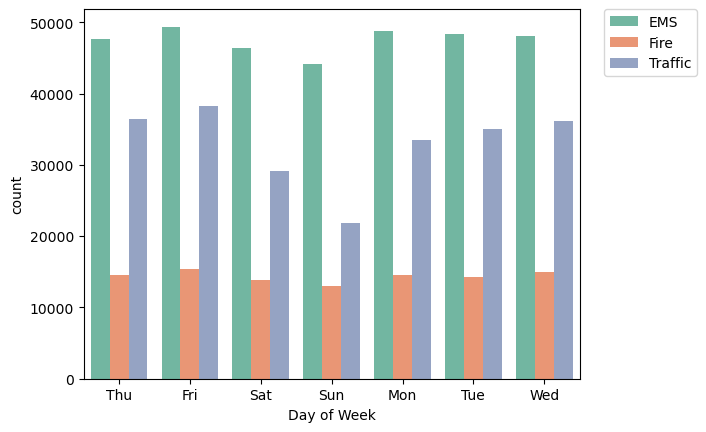

In [15]:
# Creating a Count Plot of the Day of Week with the Reason Column
sns.countplot(x='Day of Week',data=df,hue='Reasons',palette='Set2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)